## [Rydberg-Rydberg Interactions](#1)

## [$C_6$](#2)

## [Rydberg blockade](#3)

## [$^3S_1$](#4)

## [$^1S_1$](#5)

## [$^1P_1$](#6)

In [1]:
# Configure the matplotlib graphics library and configure it to show 
# figures inline in the notebook

%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
#import sys, os
#rootDir = '/Users/joannalis/Documents/ARC-Alkali-Rydberg-Calculator-master' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
#sys.path.insert(0,rootDir)

from arc import*
#from arc.beta import *                 #Import ARC (Alkali Rydberg Calculator)

import scipy as sp
import scipy.constants

In [2]:
""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon_0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
e = sp.constants.e
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

In [3]:
class Ytterbium174(DivalentAtom):
    """
    Properties of Ytterbium 174 atoms
    """

    ionisationEnergycm = 50443.08  # cm-1  ref. [#yb3]
    ionisationEnergy = ionisationEnergycm / 8065.544  # eV ref.

    Z = 70
    I = 0

    #: TODO source
    scaledRydbergConstant = 109736.627 * 1e2 * \
        physical_constants["inverse meter-electron volt relationship"][0]

    
    quantumDefect = [[[4.278337, -5.625, 91.65, -156050, -4.973e7, 1.102e10],
                      [3.95433, -12.33, 1729.0, 0.0, 0.0, 0.0],
                      [2.713094, -1.8646, -2145.5,  3940500, -3.1036e9, 1.0690e12],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [5.53658095, -1.62860818e3, 8.89586904e5, -2.56965006e8, 3.68075379e10, -2.05360653e12],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [3.35341176, 1.39820521e4, -5.21416397e7, 8.52192405e10, -6.58314910e13, -1.95529526e16],
                      [2.748679, -0.5200, -1186.01,  1564600, -9.8134e8, 2.426e11],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[4.4382, 6.0, -1.8e4, 1.8e7, -7.0e9, 0.0],
                      [3.91038501, 4.44122338e1, -6.00452428e4, 2.91808081e7, -6.11071416e9, 4.59331291e11],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]
    
    """ Contains list of modified Rydberg-Ritz coefficients for calculating
        quantum defects for
        [[ :math:`^1S_{0},^1P_{1},^1D_{2},^1F_{3}`],
        [ :math:`^3S_{0},^3P_{0},^3D_{1},^3F_{2}`],
        [ :math:`^3S_{0},^3P_{1},^3D_{2},^3F_{3}`],
        [ :math:`^3S_{1},^3P_{2},^3D_{3},^3F_{4}`]]."""

    #3S1: https://arxiv.org/pdf/1912.08754.pdf
    #1S0, 1D2, 3D2: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.98.062506?casa_token=pPBhrZ-7EEsAAAAA%3AcQenteyGZIEsoy3M2fF1vQLvwHpW_dPubroCIzQ1lgcilhoJnSoqsoSoDjNBNmiyfuk7opAa8Orsfw
    #1P1: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.45.1732
    #3P0,1,2: https://iopscience.iop.org/article/10.1088/0022-3700/17/18/006/pdf

    groundStateN = 6
    extraLevels = []  #: TODO unkown if such exist at time of writing

    #: Sources Refs. [#yb1]_, [#yb2]_, [#yb3]_
    levelDataFromNIST = "yb_level_data.csv"

    precalculatedDB = "yb_precalculated.db"
    dipoleMatrixElementFile = "yb_dipole_matrix_elements.npy"
    quadrupoleMatrixElementFile = "yb_quadrupole_matrix_elements.npy"

    literatureDMEfilename = 'ytterbium_literature_dme.csv'

    elementName = 'Yb174'
    meltingPoint = 819 + 273.15  #: in K

    #: Ref. [#nist]_
    mass = 173.9388664 * \
        physical_constants["atomic mass constant"][0]

    #: Quantum defect principal quantum number fitting ranges for different
    #: series
    defectFittingRange = {"1S0": [23, 80], "1P1": [39, 55], 
                          "1D2": [31, 80], "3D2": [28, 80], 
                          "3S1": [35, 80], "3P0": [19, 33],
                          "3P1": [34, 84], "3P2": [18, 93]}

In [4]:
#Load parameters for Yb 174
atom=Ytterbium174()

# Rydberg-Rydberg Interactions<a class="anchor" id="1"></a>

The Rydberg states have extremly large dipole moments making them ideal candidates for controlled long-range interactions in quantum information processing and for studying effects such as resonant energy transfer or superradiance. 

For two atoms separated by distance $\mathbf{R}$ the dipole-dipole intercation is given by
$$
V(\textbf{R}) =  \frac{\textbf{$\mu$}_1\cdot\textbf{$\mu$}_2}{R^3} -\frac{3(\textbf{$\mu$}_1\cdot\textbf{R})(\textbf{$\mu$}_2\cdot\textbf{R})}{R^5},
$$
where the dipole matrix elements $\mu_{1,2}$ describe transitions from the initial Rydberg states $|r\rangle$ to other dipole-coupled states $|r'\rangle$, $|r''\rangle$ respectively. The dipole-coupled pair-states have an energy difference $\Delta$ given by 
$$
\Delta = E_{r'}+E_{r''}-2E_{r},
$$
with the dominant contribution to the atom-atom interaction arising from the pair state with the smallest absolute defect $|\Delta|$. Reducing this to a simple two-pair problem, the Hamiltonian for the states $|rr\rangle$, $|r'r''\rangle$ is given by
$$
\mathcal{H} = \begin{pmatrix}
0 &V(R) \\
V(R)&\Delta
\end{pmatrix},
$$
which has eigenvalues
$$
\lambda_\pm = \frac{\Delta\pm\sqrt{\Delta^2+4V(R)^2}}{2}.
$$

This results in two asymptotic limits for the atom-atom interactions:

**i) Long range "Van der Waals regime" ($V(R)\ll \Delta$)**

Pair state energy is shifted by $-V(R)^2/\Delta = -C_6/R^6$. The sign of the interaction (attractive/repulsive) is determined by $\Delta$, and the interaction scales as $C_6\propto n^{11}$.

**ii) Short range "dipole-dipole regime" ($V(R)\gg \Delta$)**

$\lambda = \pm C_3/R^3$ with $C_3\propto n^4$

The transition between these two regimes is known as the Van der Waals radius occuring at $V(R_\mathrm{vdW})=\Delta$ with $R_\mathrm{vdW}=\sqrt[6]{C_6/|\Delta|}$.

Typically $\Delta \neq 0$ for Rydberg states, however, for small $\Delta$ an external electric field can be used to Stark-shift the pair states into resonance known as a Förster  resonance, resulting in resonant $C_3/R^3$ behaviour at all radii. 

# $C_6$ <a class="anchor" id="2"></a>

$C_6$ for individual coupling channels (two pair-states $|n,l,j,n,l,j            \rangle \leftrightarrow |n_1,l_1,j_1,n_2,l_2,j_2\rangle$):

$$
C_6 = \frac{1}{4\pi\varepsilon_0}                     \frac{|\langle n,l,j |er|n_1,l_1,j_1\rangle|^2|                    \langle n,l,j |er|n_2,l_2,j_2\rangle|^2}                    {E(n_1,l_1,j_2,n_2,j_2,j_2)-E(n,l,j,n,l,j)} (h \space \mathrm{Hz}\space \mathrm{m^6})
$$

In [5]:
#[n, l, j, n1, l1, j1, n2, l2, j2, s]
# |nlj , nlj> and |n1l1j1 , n2l2j2>
channels = [[70, 0, 0, 70, 1, 1, 69, 1, 1, 0],#|70 1S0, 70 1S0 > and |70 1P1, 69 1P1>
            [70, 0, 1, 70, 1, 1, 69, 1, 1, 1]]#|70 3S1, 70 3S1 > and |70 3P1, 69 3P1>
print(" = = = Ytterbium = = = ")
for channel in channels:
    print("C6: %.5f  GHz (mu m)^6" % ( atom.getC6term(*channel)/C_h*1.e27 ))

 = = = Ytterbium = = = 
C6: 47.57163  GHz (mu m)^6
C6: 0.05647  GHz (mu m)^6


For the long-range limit, the $C_6$ dispersion coefficient can be calculated using second-order perturbation theory valid for $R>R_\mathrm{vdW}$ and taking a sum over all dipole-coupled pair-states using equation
$$
C_6 = \displaystyle\sum_{r'r''} \frac{\left| \langle r'r''\vert V(R) \vert rr\rangle\right|^2}{\Delta_{r',r''}}.
$$

As well as the dependence upon the sign of $\Delta$ for attractive/repulsive interactions, the form of the dipole interaction above is anisotropic leading to a strong angular sensitivity. Defining an angle $(\theta, \phi)$ in spherical basis between the quantization axis and the interatomic separation vector $\mathbf{R}$, the plots below highlight the difference in interaction strength of the different $\ell$ states. 

Note: Typically, this sum is constrained to include only pair states up to a maximum value of  Δ  to minimise computational overhead, and this can be set to achieve convergence.

Compare with https://arxiv.org/pdf/1203.3736.pdf:

In [6]:
#Long range C6 coefficient from https://arxiv.org/pdf/1203.3736.pdf
#only for mj = +-j states

def C6_lit(n_list, a, b, c):
    return np.array(np.multiply([n**(11) * (a*n**2 + b*n + c) for n in n_list], 1e-19*1.4448))

# 1S0 state
a1 = 9.84*1e-5 ; b1 = 0.0234 ; c1 = -0.421 # in a.u.
# 1P1 state
a2 = -7.74*1e-4 ; b2 = 0.167 ; c2 = -2.73 # in a.u.

c6S_lit = C6_lit([60], a1, b1, c1).flatten()  # in GHz um^6 
c6P_lit = C6_lit([60], a2, b2, c2).flatten()  # in GHz um^6 

print("C6 60 1S0 ; singlet = %.2f GHz (mum)^6 = %.2f 1e-19 a.u." % (c6S_lit, c6S_lit/1.448))
print("C6 60 1P1 ; singlet = %.2f GHz (mum)^6 = %.2f 1e-19 a.u." % (c6P_lit, c6P_lit/1.448))

C6 60 1S0 ; singlet = 7.01 GHz (mum)^6 = 4.84 1e-19 a.u.
C6 60 1P1 ; singlet = 23.61 GHz (mum)^6 = 16.30 1e-19 a.u.


# Rydberg blockade <a class="anchor" id="3"></a>

At large interatomic separations $\mathbf{R}$, the shift in energy is small compared to the transition linewidth, $\Gamma$, and the second atom can be excited with the same dynamics as expected for the single-atom case. However, at a certain distance $R_B$ known as the blockade radius, the interaction strength, $V$, is sufficient to shift the energy level of
the second atom by more than the transition linewidth, $\Gamma$. Below that blockade distance, given by $V(R_B) = \Gamma$, the second atom is completely decoupled from the driving field, and any laser-induced dynamics bringing it to the given Rydberg state is blocked.

# $^3S_1$ <a class="anchor" id="4"></a>

C6 [60 S 2/2] ; triplet ; mj=0 : 54.88 GHz (mum)^6
------- ; ------- ;------ : 37.98 1e-19 a.u.
C6 [60 S 2/2] ; triplet ; mj=1 : 32.62 GHz (mum)^6
------- ; ------- ;------ : 22.58 1e-19 a.u.


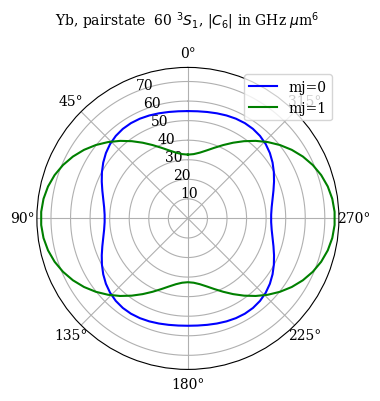

In [7]:
#Dipole-Interaction Dispersion Coefficient: 60 3S1
#=================================================
n0=60;l0=0;j0=1; s=1;#Target State
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

thetaList = np.linspace(0,2*pi,71)
mj = [0,1]
colourList = ["b","g","r"]

plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []
    
for i in [0,1]:
    calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj[i], mj[i], s=s, s2=s)
    c6 = []
    for t in thetaList:
        C6=calculation.getC6perturbatively(t,phi, dn, deltaMax);
        c6.append(abs(C6))
    
    C6 = calculation.getC6perturbatively(0,0, dn, deltaMax)
    print("C6 [%s] ; triplet ; mj=%i : %.2f GHz (mum)^6" % (printStateString(n0,l0,j0),int(mj[i]),C6))
    print("------- ; ------- ;------ : %.2f 1e-19 a.u." % (C6/1.4448))
    
    # plot results
    lineLegend, = plt.plot(thetaList,c6,"-",color=colourList[i],label=("mj=%d"%int(mj[i])))
    line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^3S_{1}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

In [8]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(60,91)
c6List = []
blockadeRadiusList = []

l=0
j=1
mj=0
s=1

theta = 90*pi/180.

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(n,l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(theta,0, 5, 35e9)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    #print("C_6 [%s ; triplet ; mj=%i]= %.0f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6List.append(c6)
    blockadeRadiusList.append(blockade)

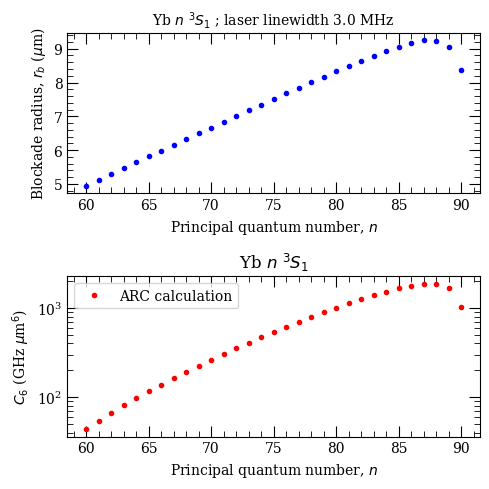

In [9]:
#lit = C6_lit(nList, a2,b2,c2)*1e-19 * 1.4448 #in GHz um^6

fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,"b.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^3S_1$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^3S_1$")
ax.semilogy(nList,abs(np.array(c6List)),"r.",label='ARC calculation')
#ax.semilogy(nList, abs(np.array(c6P_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
plt.legend()
plt.tight_layout()
plt.show()

Interaction between two $60$ $^3S_1$ atoms at 10 $\mu$m distance:

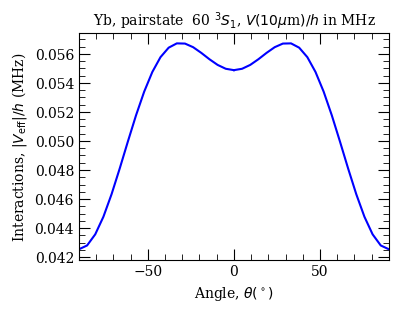

In [10]:
n=60
l=0
j=1
mj=0
s=1

calculation = PairStateInteractions(Ytterbium174(), n,l,j,n,l,j,mj,mj,s=s,s2=s)
thetaList = np.linspace(0,pi/2.,20)  # orientations of the two atoms
atomDistance = 10. # mu m

# do calculation
interactionVeff = []
for t in thetaList:
    c6 = calculation.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append((c6/atomDistance**6)*1.e3)
    
# now plotting
plt.figure(figsize=(4,3), dpi=100)
ax = plt.subplot(111)
ax.plot(thetaList/pi*180,interactionVeff,"b-")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180,interactionVeff,"b-")
ax.set_xlabel(r"Angle, $\theta (^\circ)$")
ax.set_ylabel(r"Interactions, $|V_{\rm eff}|/h$ (MHz)")
ax.set_xlim(-90,90)
plt.title("Yb, pairstate  60 $^3S_1$, $V(10 \mu$m$)/h$ in MHz",fontsize=10)
plt.show()

# $^1S_0$ <a class="anchor" id="5"></a>

C6 [60 S 0/2] ; singlet = -2.596407387 GHz (mum)^6
------- ; ------- = -1.797070450 1e-19 a.u.


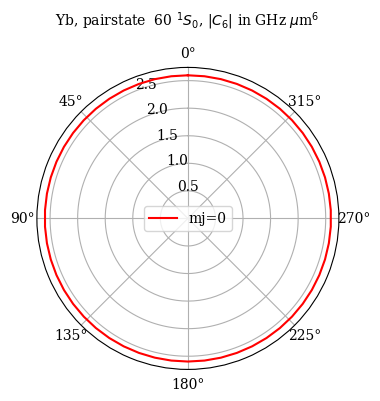

In [11]:
#Dipole-Interaction Dispersion Coefficient: 60 1S0
#================================================
#Evaluation of the Yb Rydberg 60 1S0 C6 coefficient using perturbation theory (Theta=0,phi=0)
n0=60;l0=0;j0=0;mj0=0;s=0 #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state and extract value
calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0, s=s,s2=s)
C6 = calculation.getC6perturbatively(theta,phi, dn, deltaMax)
print("C6 [%s] ; singlet = %.9f GHz (mum)^6" % (printStateString(n0,l0,j0),C6))
print("------- ; ------- = %.9f 1e-19 a.u." % (C6/1.4448))


#Angular Coupling
#================
#Evaluate C6 as a function of angle
thetaList = np.linspace(0,2*pi,55)
plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []

c6 = []
for t in thetaList:
    C6 = calculation.getC6perturbatively(t,phi, dn, deltaMax)
    c6.append(abs(C6))    
    
# plot results
lineLegend, = plt.plot(thetaList,c6,"-",color="r",label=("mj=%d"%int(mj0)) )
line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^1S_{0}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

In [12]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(30,91)
c6List = []
blockadeRadiusList = []

l=0
j=0
mj=0
s=0

theta = 90*pi/180.

#Vailant 2012 (for comaprison)
def C6_lit(n_list, a, b, c):
    return np.array([n**(11)*(a*n**2 + b*n + c)*1e-19*1.4448 for n in n_list]) #in GHz um^6
a1 = 9.84*1e-5 ; b1 = 0.0234 ; c1 = -0.421 #1S0 state in a.u.
c6S_list = []

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(int(n),l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(theta,0, 5, 35e9)
    c6List.append(c6)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    #print("C_6 [%s ; singlet ; mj=%i]= %.2f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6S = C6_lit([int(n)], a1, b1, c1)
    c6S_list.append(c6S)
    #print("Vailant 2012: %.2f GHz (mu m)^6" %c6S.flatten())

    blockadeRadiusList.append(blockade)

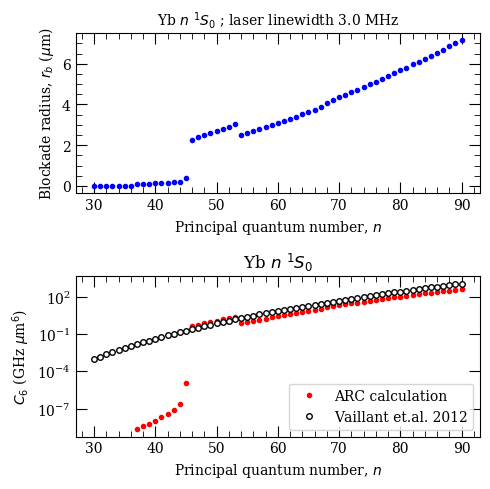

In [13]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,"b.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^1S_0$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^1S_0$")
ax.semilogy(nList,abs(np.array(c6List)),"r.",label='ARC calculation')
ax.semilogy(nList, abs(np.array(c6S_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
plt.legend()
plt.tight_layout()
plt.show()

Interaction between two $60$ $^1S_0$ atoms at 10 $\mu$m distance:

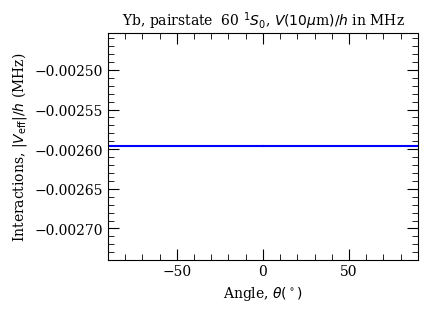

In [14]:
n=60
l=0
j=0
mj=0
s=0

calculation = PairStateInteractions(Ytterbium174(), n,l,j,n,l,j,mj,mj,s=s,s2=s)
thetaList = np.linspace(0,pi/2.,20)  # orientations of the two atoms
atomDistance = 10. # mu m

# do calculation
interactionVeff = []
for t in thetaList:
    c6 = calculation.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append((c6/atomDistance**6)*1.e3)
    
# now plotting
plt.figure(figsize=(4,3), dpi=100)
ax = plt.subplot(111)
ax.plot(thetaList/pi*180,interactionVeff,"b-")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180,interactionVeff,"b-")
ax.set_xlabel(r"Angle, $\theta (^\circ)$")
ax.set_ylabel(r"Interactions, $|V_{\rm eff}|/h$ (MHz)")
ax.set_xlim(-90,90)
plt.title("Yb, pairstate  60 $^1S_0$, $V(10 \mu$m$)/h$ in MHz",fontsize=10)
plt.show()

# $^1P_1$ <a class="anchor" id="6"></a>

C6 [60 P 2/2] ; singlet ; mj=0 : -64.25 GHz (mum)^6
------- ; ------- ;------ : -44.47 1e-19 a.u.
C6 [60 P 2/2] ; singlet ; mj=1 : -24.24 GHz (mum)^6
------- ; ------- ;------ : -16.77 1e-19 a.u.


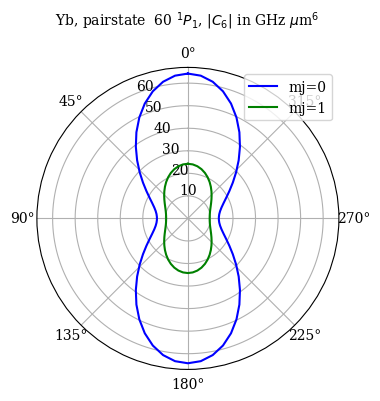

In [15]:
#Dipole-Interaction Dispersion Coefficient: 60 1P1
#=================================================
n0=60;l0=1;j0=1; s=0;#Target State
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

thetaList = np.linspace(0,2*pi,71)
mj = [0,1]
colourList = ["b","g","r"]

plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []
    
for i in [0,1]:
    calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj[i], mj[i], s=s, s2=s)
    c6 = []
    for t in thetaList:
        C6=calculation.getC6perturbatively(t,phi, dn, deltaMax);
        c6.append(abs(C6))
    
    C6 = calculation.getC6perturbatively(0,0, dn, deltaMax)
    print("C6 [%s] ; singlet ; mj=%i : %.2f GHz (mum)^6" % (printStateString(n0,l0,j0),int(mj[i]),C6))
    print("------- ; ------- ;------ : %.2f 1e-19 a.u." % (C6/1.4448))
    
    # plot results
    lineLegend, = plt.plot(thetaList,c6,"-",color=colourList[i],label=("mj=%d"%int(mj[i])))
    line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^1P_{1}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

In [16]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(30,91)
c6List = []
blockadeRadiusList = []

l=1
j=1
mj=1
s=0

theta = 90*pi/180.

#Vailant 2012 (for comaprison)
def C6_lit(n_list, a, b, c):
    return np.array([n**(11)*(a*n**2 + b*n + c)*1e-19*1.4448 for n in n_list]) #in GHz um^6
a2 = -7.74*1e-4 ; b2 = 0.167 ; c2 = -2.73 # 1P1 state in a.u.
c6P_list = [] # in GHz um^6 

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(n,l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(theta,0, 5, 35e9)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    #print("C_6 [%s ; singlet ; mj=%i]= %.0f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6List.append(c6)
    c6P = C6_lit([int(n)], a2, b2, c2)
    c6P_list.append(c6P)
    #print("Vailant 2012: %.2f GHz (mu m)^6" %c6P.flatten())
    blockadeRadiusList.append(blockade)

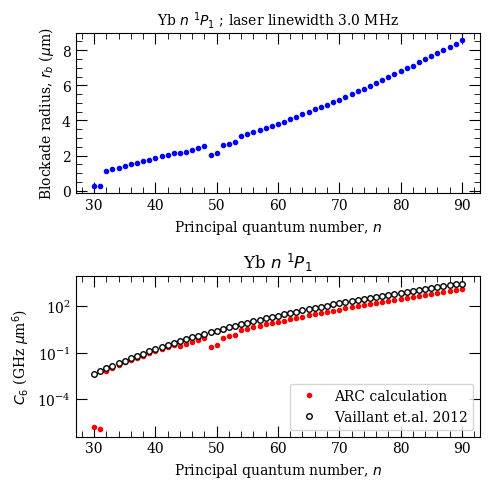

In [17]:
lit = C6_lit(nList, a2,b2,c2)*1e-19 * 1.4448 #in GHz um^6

fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,"b.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^1P_1$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^1P_1$")
ax.semilogy(nList,abs(np.array(c6List)),"r.",label='ARC calculation')
ax.semilogy(nList, abs(np.array(c6P_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
plt.legend()
plt.tight_layout()
plt.show()

Interaction between two $60$ $^1P_1$ atoms at 10 $\mu$m distance:

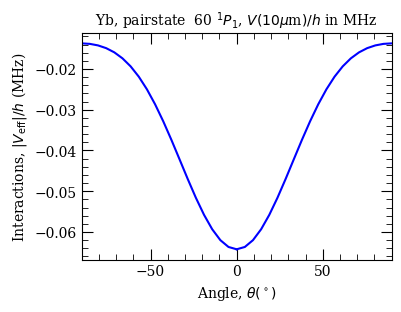

In [18]:
n=60
l=1
j=1
mj=0
s=0

calculation = PairStateInteractions(Ytterbium174(), n,l,j,n,l,j,mj,mj,s=s,s2=s)
thetaList = np.linspace(0,pi/2.,20)  # orientations of the two atoms
atomDistance = 10. # mu m

# do calculation
interactionVeff = []
for t in thetaList:
    c6 = calculation.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append((c6/atomDistance**6)*1.e3)
    
# now plotting
plt.figure(figsize=(4,3), dpi=100)
ax = plt.subplot(111)
ax.plot(thetaList/pi*180,interactionVeff,"b-")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180,interactionVeff,"b-")
ax.set_xlabel(r"Angle, $\theta (^\circ)$")
ax.set_ylabel(r"Interactions, $|V_{\rm eff}|/h$ (MHz)")
ax.set_xlim(-90,90)
plt.title("Yb, pairstate  60 $^1P_1$, $V(10 \mu$m$)/h$ in MHz",fontsize=10)
plt.show()